#### Tags
- Linear Regression
- Normal Form Equation
- SKlearn Linear Regression
- Data Visualization

##### Web Page Link
[Linear Regression]( https://sites.google.com/view/horizon-ml/machine-learning/supervised-learning/algorithms/linear-regression)

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pp

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import SGDRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
data = pd.read_csv('data/graduate/Admission_Predict.csv')

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [5]:
pp.ProfileReport(data)

/opt/anaconda3/envs/Pytthon3/lib/python3.7/site-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,9
Number of observations,400
Total Missing (%),0.0%
Total size in memory,28.2 KiB
Average record size in memory,72.3 B
Numeric,8
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


#### Data Analysis - based on initial analysis
- No null values.
- all fields are numerical.
- Seriel no. is just a unique identifier like index , not required for prediction
- University ranking and Research are sort of categorical data.
- Gre Score  can be bucketized.
- Ration of data in Research field is almost equal.

In [6]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

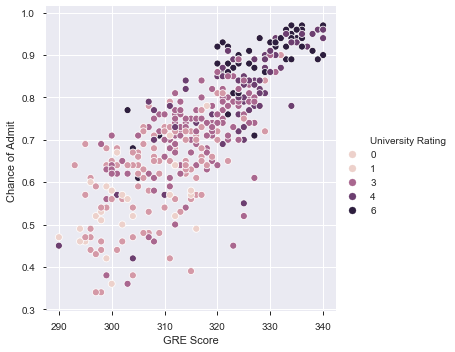

In [7]:
## Analyse the chance of Admit - based on Gre Score for different ranked University
%matplotlib inline
sns.relplot(x="GRE Score", y="Chance of Admit ", hue="University Rating", data=data);


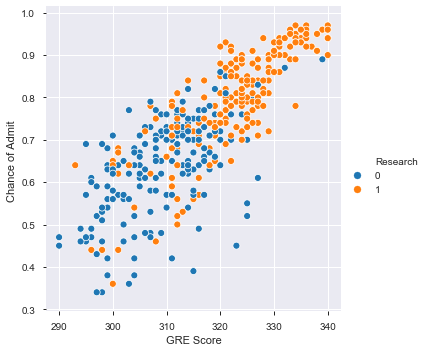

In [8]:
## Analyse the chance of Admit - based on Gre Score for research and non research
sns.relplot(x="GRE Score", y="Chance of Admit ", hue="Research", data=data);

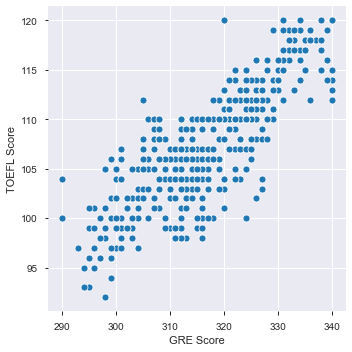

In [9]:
### How Gre And Toffle Score are related 
sns.relplot(x="GRE Score", y="TOEFL Score",  data=data);
## seems to be linear relation

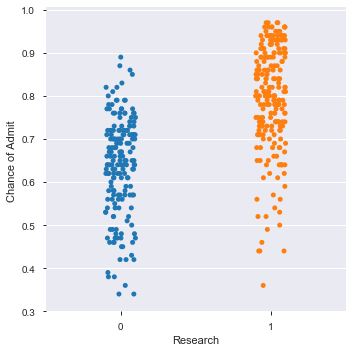

In [10]:
sns.catplot(x="Research", y="Chance of Admit ", data=data);

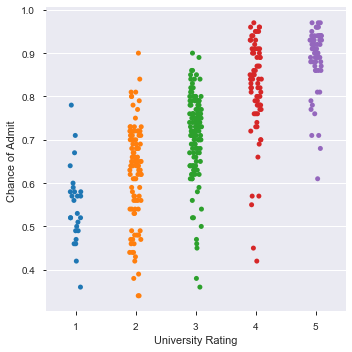

In [11]:
sns.catplot(x="University Rating", y="Chance of Admit ", data=data);

#### Data Preprocessing
- shuffle data
- divide train and test data
- have normalized and non normalized data.
- feature selection and label value

In [12]:
data = shuffle(data)

In [13]:
features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research']
label = ['Chance of Admit ']
X = data[features]
y = data[label]

In [14]:
 X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

In [15]:
scaler = StandardScaler()
X_train_scal = scaler.fit_transform(X_train)
X_val_scal = scaler.transform(X_val)

In [16]:
print('Shape of X train', X_train.shape)
print('Shape of y train', y_train.shape)

print('Shape of X val', X_val.shape)
print('Shape of y val', y_val.shape)

Shape of X train (320, 7)
Shape of y train (320, 1)
Shape of X val (80, 7)
Shape of y val (80, 1)


#### Prediction using Normal Equation

In [17]:
## Normal Form using un scaled data
%time
step1 = np.dot(X_train.T, X_train)
step2 = np.linalg.pinv(step1)
step3 = np.dot(step2, X_train.T)
theta = np.dot(step3, y_train)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


In [18]:
print('Shape of weights', theta.shape)

Shape of weights (7, 1)


In [19]:
y_pred = np.dot(X_val, theta)

In [20]:
print('MSE', mean_squared_error(y_pred, y_val))
print('MAE', mean_absolute_error(y_pred, y_val))

MSE 0.004925989987565292
MAE 0.049179657533067335


In [21]:
## Normal Form using Scaler data
%time
step1 = np.dot(X_train_scal.T, X_train_scal)
step2 = np.linalg.pinv(step1)
step3 = np.dot(step2, X_train_scal.T)
theta = np.dot(step3, y_train)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.81 µs


In [22]:
y_pred = np.dot(X_val_scal, theta)

In [23]:
print('MSE', mean_squared_error(y_pred, y_val))
print('MAE', mean_absolute_error(y_pred, y_val))

MSE 0.5292556101703264
MAE 0.7244587222953243


In [24]:
#### Prediction using Regressor

In [25]:
%time
fitter = SGDRegressor(loss="squared_loss", penalty=None)
fitter.fit(X_train, y_train)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.05 µs


/opt/anaconda3/envs/Pytthon3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [26]:
y_pred = fitter.predict(X_val)

In [27]:
print('MSE', mean_squared_error(y_pred, y_val))
print('MAE', mean_absolute_error(y_pred, y_val))

MSE 7.389187469857475e+27
MAE 85886309122665.25


In [28]:
%time
fitter = SGDRegressor(loss="squared_loss", penalty=None)
fitter.fit(X_train_scal, y_train)

CPU times: user 15 µs, sys: 0 ns, total: 15 µs
Wall time: 5.01 µs


/opt/anaconda3/envs/Pytthon3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [29]:
y_pred = fitter.predict(X_val_scal)

In [30]:
print('MSE', mean_squared_error(y_pred, y_val))
print('MAE', mean_absolute_error(y_pred, y_val))

MSE 0.004393735581545674
MAE 0.048139599590612245
